<hr style="border: solid 3px blue;">

# Introduction

![](https://miro.medium.com/max/1156/1*Tom80X_DVuAhT4p6SiKLIA.gif) 

Picture Credit: https://miro.medium.com

**The Curse of Dimensionality**

> Dimensionally cursed phenomena occur in domains such as numerical analysis, sampling, combinatorics, machine learning, data mining and databases. The common theme of these problems is that when the dimensionality increases, the volume of the space increases so fast that the available data become sparse. In order to obtain a reliable result, the amount of data needed often grows exponentially with the dimensionality. Also, organizing and searching data often relies on detecting areas where objects form groups with similar properties; in high dimensional data, however, all objects appear to be sparse and dissimilar in many ways, which prevents common data organization strategies from being efficient.

Ref: https://en.wikipedia.org/wiki/Curse_of_dimensionality

**Dimension reduction** is to create a new dimension data set by reducing the dimension of a multidimensional data set composed of very many features. In general, as the dimension increases, the distance between data points becomes exponentially farther, and it has a sparse structure. In the case of a data set consisting of hundreds or more features, the prediction reliability is lower than that of a model trained on relatively few dimensions. Also, if there are many features, the correlation between individual features is likely to be high. In a linear model such as linear regression, when the correlation between input variables is high, the predictive performance of the model decreases due to the multicollinearity problem.

In this notebook, we summarize the dimensionality reduction methods that can interpret data more intuitively by reducing features by reducing the dimensions of multidimensional features.

The dataset uses the commonly used **MNIST dataset**. The MNIST dataset we commonly use has a size of $28 x 28$. When looking at this dataset through dimensionality reduction, we will check if there is any regularity and how labels are clustered according to each dimensionality reduction method.

---------------------------------------------------------------------
# Loading library and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The effect of each dimension reduction is identified using the MNIST dataset. 

In [2]:
from keras.datasets import mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

------------------------------------------------------------------------------------------
# Checking train dataset

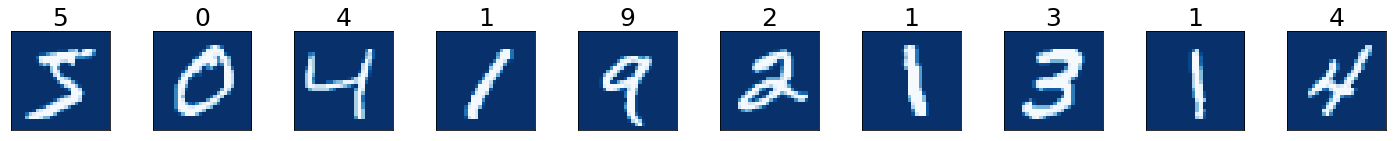

In [3]:
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(10):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(train_x[idx], cmap='Blues_r')
    ax.set_title(str(train_y[idx]),fontsize=25)

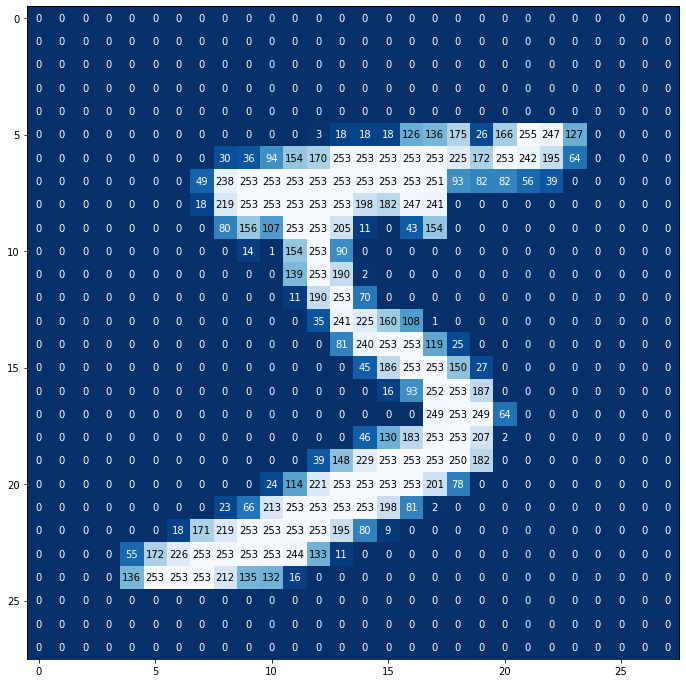

In [4]:
img = train_x[0]

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='Blues_r')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

In [5]:
# Reshape to 2D data
train_x = train_x.reshape(train_x.shape[0], -1)
print(train_x.shape)

sample_size = 5000
# Use only the top 1000 data for training
train_x = pd.DataFrame(train_x[:sample_size, :])
train_y = train_y[:sample_size]

(60000, 784)


__________________________________________________________________
# PCA
PCA is the most representative method of dimensionality reduction. This is a method of re-axis of multidimensional data in the direction of large variance. The greater the dependence between variables, the smaller the principal component can represent the original data.
However, since it is assumed that each feature follows a normal distribution, it is not appropriate to apply a variable with a distorted distribution to PCA.

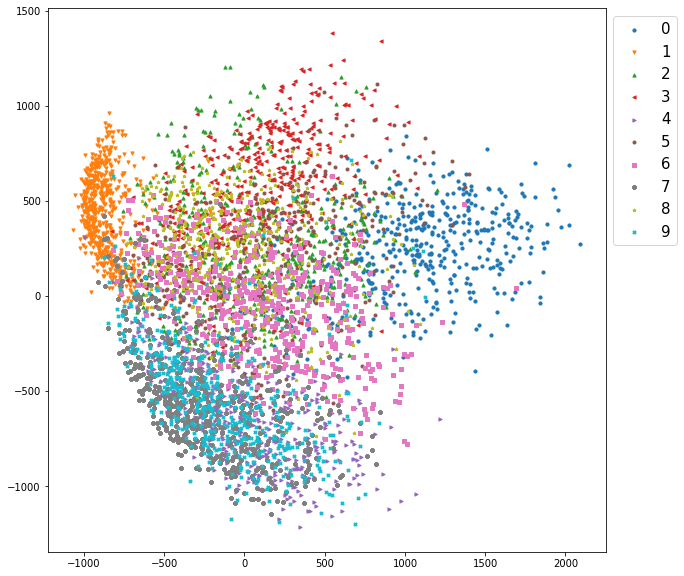

In [6]:
from sklearn.decomposition import PCA

pca = PCA()
x_pca = pca.fit_transform(train_x)
markers=['o','v','^','<','>','8','s','P','*','X']
# plot in 2D by class
plt.figure(figsize=(10,10))
for i,marker in enumerate(markers):
    mask = train_y == i
    plt.scatter(x_pca[mask, 0], x_pca[mask, 1], label=i, s=10, alpha=1,marker=marker)
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left',fontsize=15)


# Truncated SVD
Truncated SVD is a method of extracting and decomposing only the upper part of the diagonal elements in the sigma matrix, that is, the upper part of the singular values.
With this decomposition, the original matrix cannot be accurately restored because it artificially decomposes $U∑V^T$ of smaller dimensions.
However, despite the data information being compressed and decomposed, it is possible to approximate the original matrix to a considerable degree.

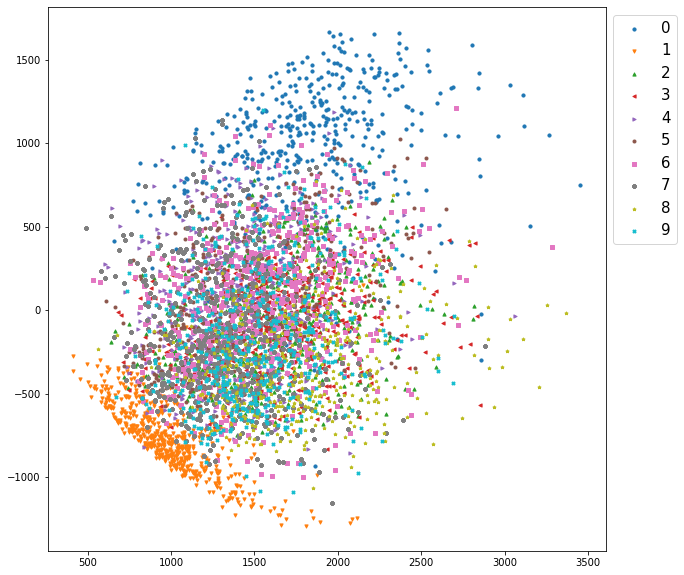

In [7]:
from sklearn.decomposition import TruncatedSVD

tsvd = TruncatedSVD()
x_tsvd = tsvd.fit_transform(train_x)
markers=['o','v','^','<','>','8','s','P','*','X']
# plot in 2D by class
plt.figure(figsize=(10,10))
for i,marker in enumerate(markers):
    mask = train_y == i
    plt.scatter(x_tsvd[mask, 0], x_tsvd[mask, 1], label=i, s=10, alpha=1,marker=marker)
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left',fontsize=15)


-------------------------------------------------------------------
# NMF

NMF is a variant of the Low-Rank Approximation method like SVD. However, it must be guaranteed that the values ​​of all elements in the source matrix are positive. NMF decomposes a matrix into W and H matrices. The W matrix indicates how well the values ​​of the latent elements correspond to the source matrix. The H matrix represents how this latent element is composed of sour features.

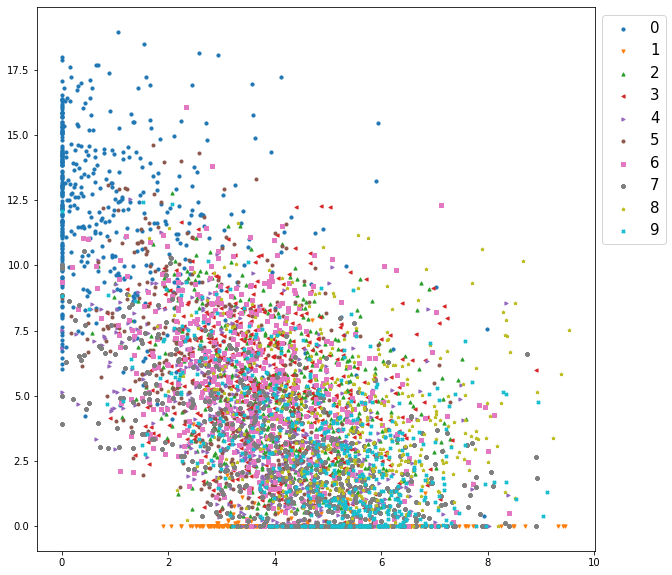

In [8]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=2, init='random', random_state=0)
x_nmf = nmf.fit_transform(train_x)
markers=['o','v','^','<','>','8','s','P','*','X']
# plot in 2D by class
plt.figure(figsize=(10,10))
for i,marker in enumerate(markers):
    mask = train_y == i
    plt.scatter(x_nmf[mask, 0], x_nmf[mask, 1], label=i, s=10, alpha=1,marker=marker)
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left',fontsize=15)

------------------------------------------
# LDA
LDA is a method of dimensionality reduction in the classification problem of supervised learning. It finds a low-dimensional feature space that can classify the training data well, and reduces the dimensionality by projecting the original features into that space.

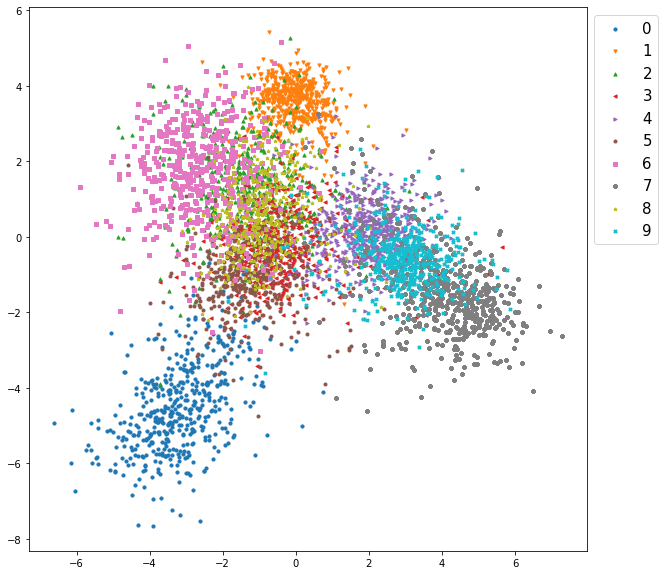

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
x_lda = lda.fit_transform(train_x, train_y)

plt.figure(figsize=(10,10))
for i,marker in enumerate(markers):
    mask = train_y == i
    plt.scatter(x_lda[mask, 0], x_lda[mask, 1], label=i, s=10, alpha=1,marker=marker)
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left',fontsize=15)

---------------------------------------------
# t-SNE
t-SNE is often used for visualization purposes by compressing data on a two-dimensional plane. Points that are close to the original feature space are also expressed in a two-dimensional plane after compression. Since the nonlinear relationship can be identified, the model performance can be improved by adding the compression results expressed by these t-SNEs to the original features. However, since the computation cost is high, it is not suitable for compression exceeding two or three dimensions.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


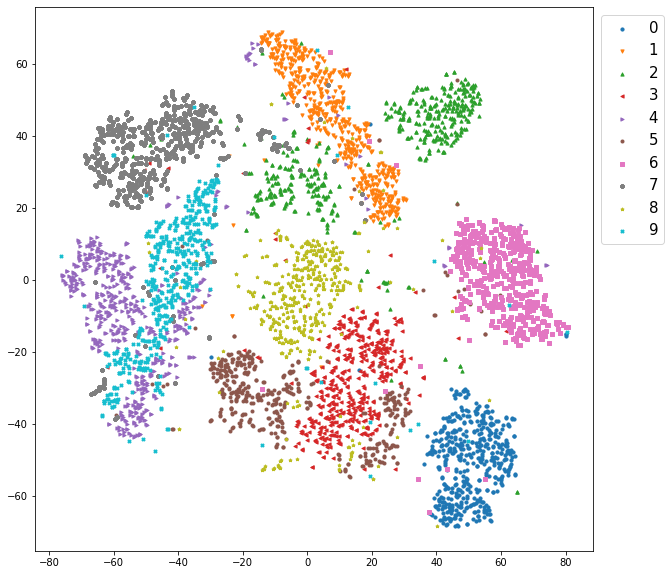

In [10]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
x_tsne = tsne.fit_transform(train_x)

plt.figure(figsize=(10,10))
for i,marker in enumerate(markers):
    mask = train_y == i
    plt.scatter(x_tsne[mask, 0], x_tsne[mask, 1], label=i, s=10, alpha=1,marker=marker)
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left',fontsize=15)

-------------------------------------------------------
# UMAP
UMAP (Uniform Manifold Approximation and Projection), which is faster than t-SNE and separates the data space well, has been proposed for nonlinear dimensionality reduction. In other words, it can process very large datasets quickly and is suitable for sparse matrix data. Furthermore, compared to t-SNE, it has the advantage of being able to embed immediately when new data comes in from other machine learning models.

In [13]:
pip install umap

  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3565 sha256=72d5a17abf4279fc6d267da85d79f292536e068e2c2a2e411411b419edf7ecd1
  Stored in directory: /root/.cache/pip/wheels/65/55/85/945cfb3d67373767e4dc3e9629300a926edde52633df4f0efe
Successfully built umap


In [15]:
import umap

In [16]:

um = umap.UMAP()
x_umap = um.fit_transform(train_x)

plt.figure(figsize=(10,10))
for i,marker in enumerate(markers):
    mask = train_y == i
    plt.scatter(x_umap[mask, 0], x_umap[mask, 1], label=i, s=10, alpha=1,marker=marker)
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left',fontsize=15)


AttributeError: ignored

## UMAP connectivity plot

> UMAP works by constructing an intermediate topological representation of the approximate manifold the data may have been sampled from. In practice this structure can be simplified down to a weighted graph. Sometimes it can be beneficial to see how that graph (representing connectivity in the manifold) looks with respect to the resulting embedding. It can be used to better understand the embedding, and for diagnostic purposes.

Ref: https://umap-learn.readthedocs.io

In [17]:
import umap.plot
mapper = umap.UMAP().fit(train_x)
umap.plot.connectivity(mapper, show_points=True)

ModuleNotFoundError: ignored

## Another UMAP plot

In [18]:
umap.plot.points(mapper, labels=train_y, theme='fire')

AttributeError: ignored

It looks like an orderly universe. A few galaxies seem to be visible as well.

------------------------------------------------------------
# UMAP 3D plot

In [19]:
import plotly
import plotly.express as px
from umap import UMAP

umap_3d = UMAP(n_components=3, init='random', random_state=0)
x_umap = umap_3d.fit_transform(train_x)
umap_df = pd.DataFrame(x_umap)
train_y_sr = pd.Series(train_y,name='label')
print(type(x_umap))
new_df = pd.concat([umap_df,train_y_sr],axis=1)
fig = px.scatter_3d(
    new_df, x=0, y=1, z=2,
    color='label', labels={'color': 'number'}
)
fig.update_traces(marker_size=1)
fig.show()

ImportError: ignored

The figure above was drawn by reducing the dimension to 3D with UMAP.

If you compare it with the previous two-dimensional plot, you can see that it is visually complex and the points are distributed sparsely in space.
**If the dimension is increased further, the above phenomenon will become more severe.**

**It's a small experiment, but we've experienced the curse of a dimension.**

------------------------------------------
# AutoEncoder

AutoEncoder is a dimension reduction method using a neural network. By learning a neural network that outputs the same value as the input using an intermediate layer smaller than the input dimension, a lower-dimensional representation that can reproduce the original data can be learned.

There are several types of AutoEncoders.
**The note below summarizes the usage examples of AutoEncoder. Reading it will help you a lot in understanding AutoEncoder.**

* Denoising AutoEncoder: https://www.kaggle.com/ohseokkim/simple-denoising-autoencoder
* Anomaly Dection by AutoEncoder: https://www.kaggle.com/ohseokkim/anomaly-dectection-by-autoencoder

<hr style="border: solid 3px blue;">